In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
from sklearn.datasets import load_diabetes #importing wine dataset from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [31]:
diabetes=load_diabetes()

In [32]:
type(diabetes)

sklearn.utils.Bunch

In [12]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

###### We now obtain desription

In [33]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [34]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [35]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [36]:
data=diabetes.data
type(data)

numpy.ndarray

In [37]:
data.shape

(442, 10)

In [39]:
data=pd.DataFrame(data=data, columns=diabetes.feature_names)

In [40]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [41]:
data['class']=diabetes.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,class
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# Understand your data

In [43]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,class
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  class   442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [46]:
data.isnull().sum()

age      0
sex      0
bmi      0
bp       0
s1       0
s2       0
s3       0
s4       0
s5       0
s6       0
class    0
dtype: int64

## Data Visualisation and feature selection

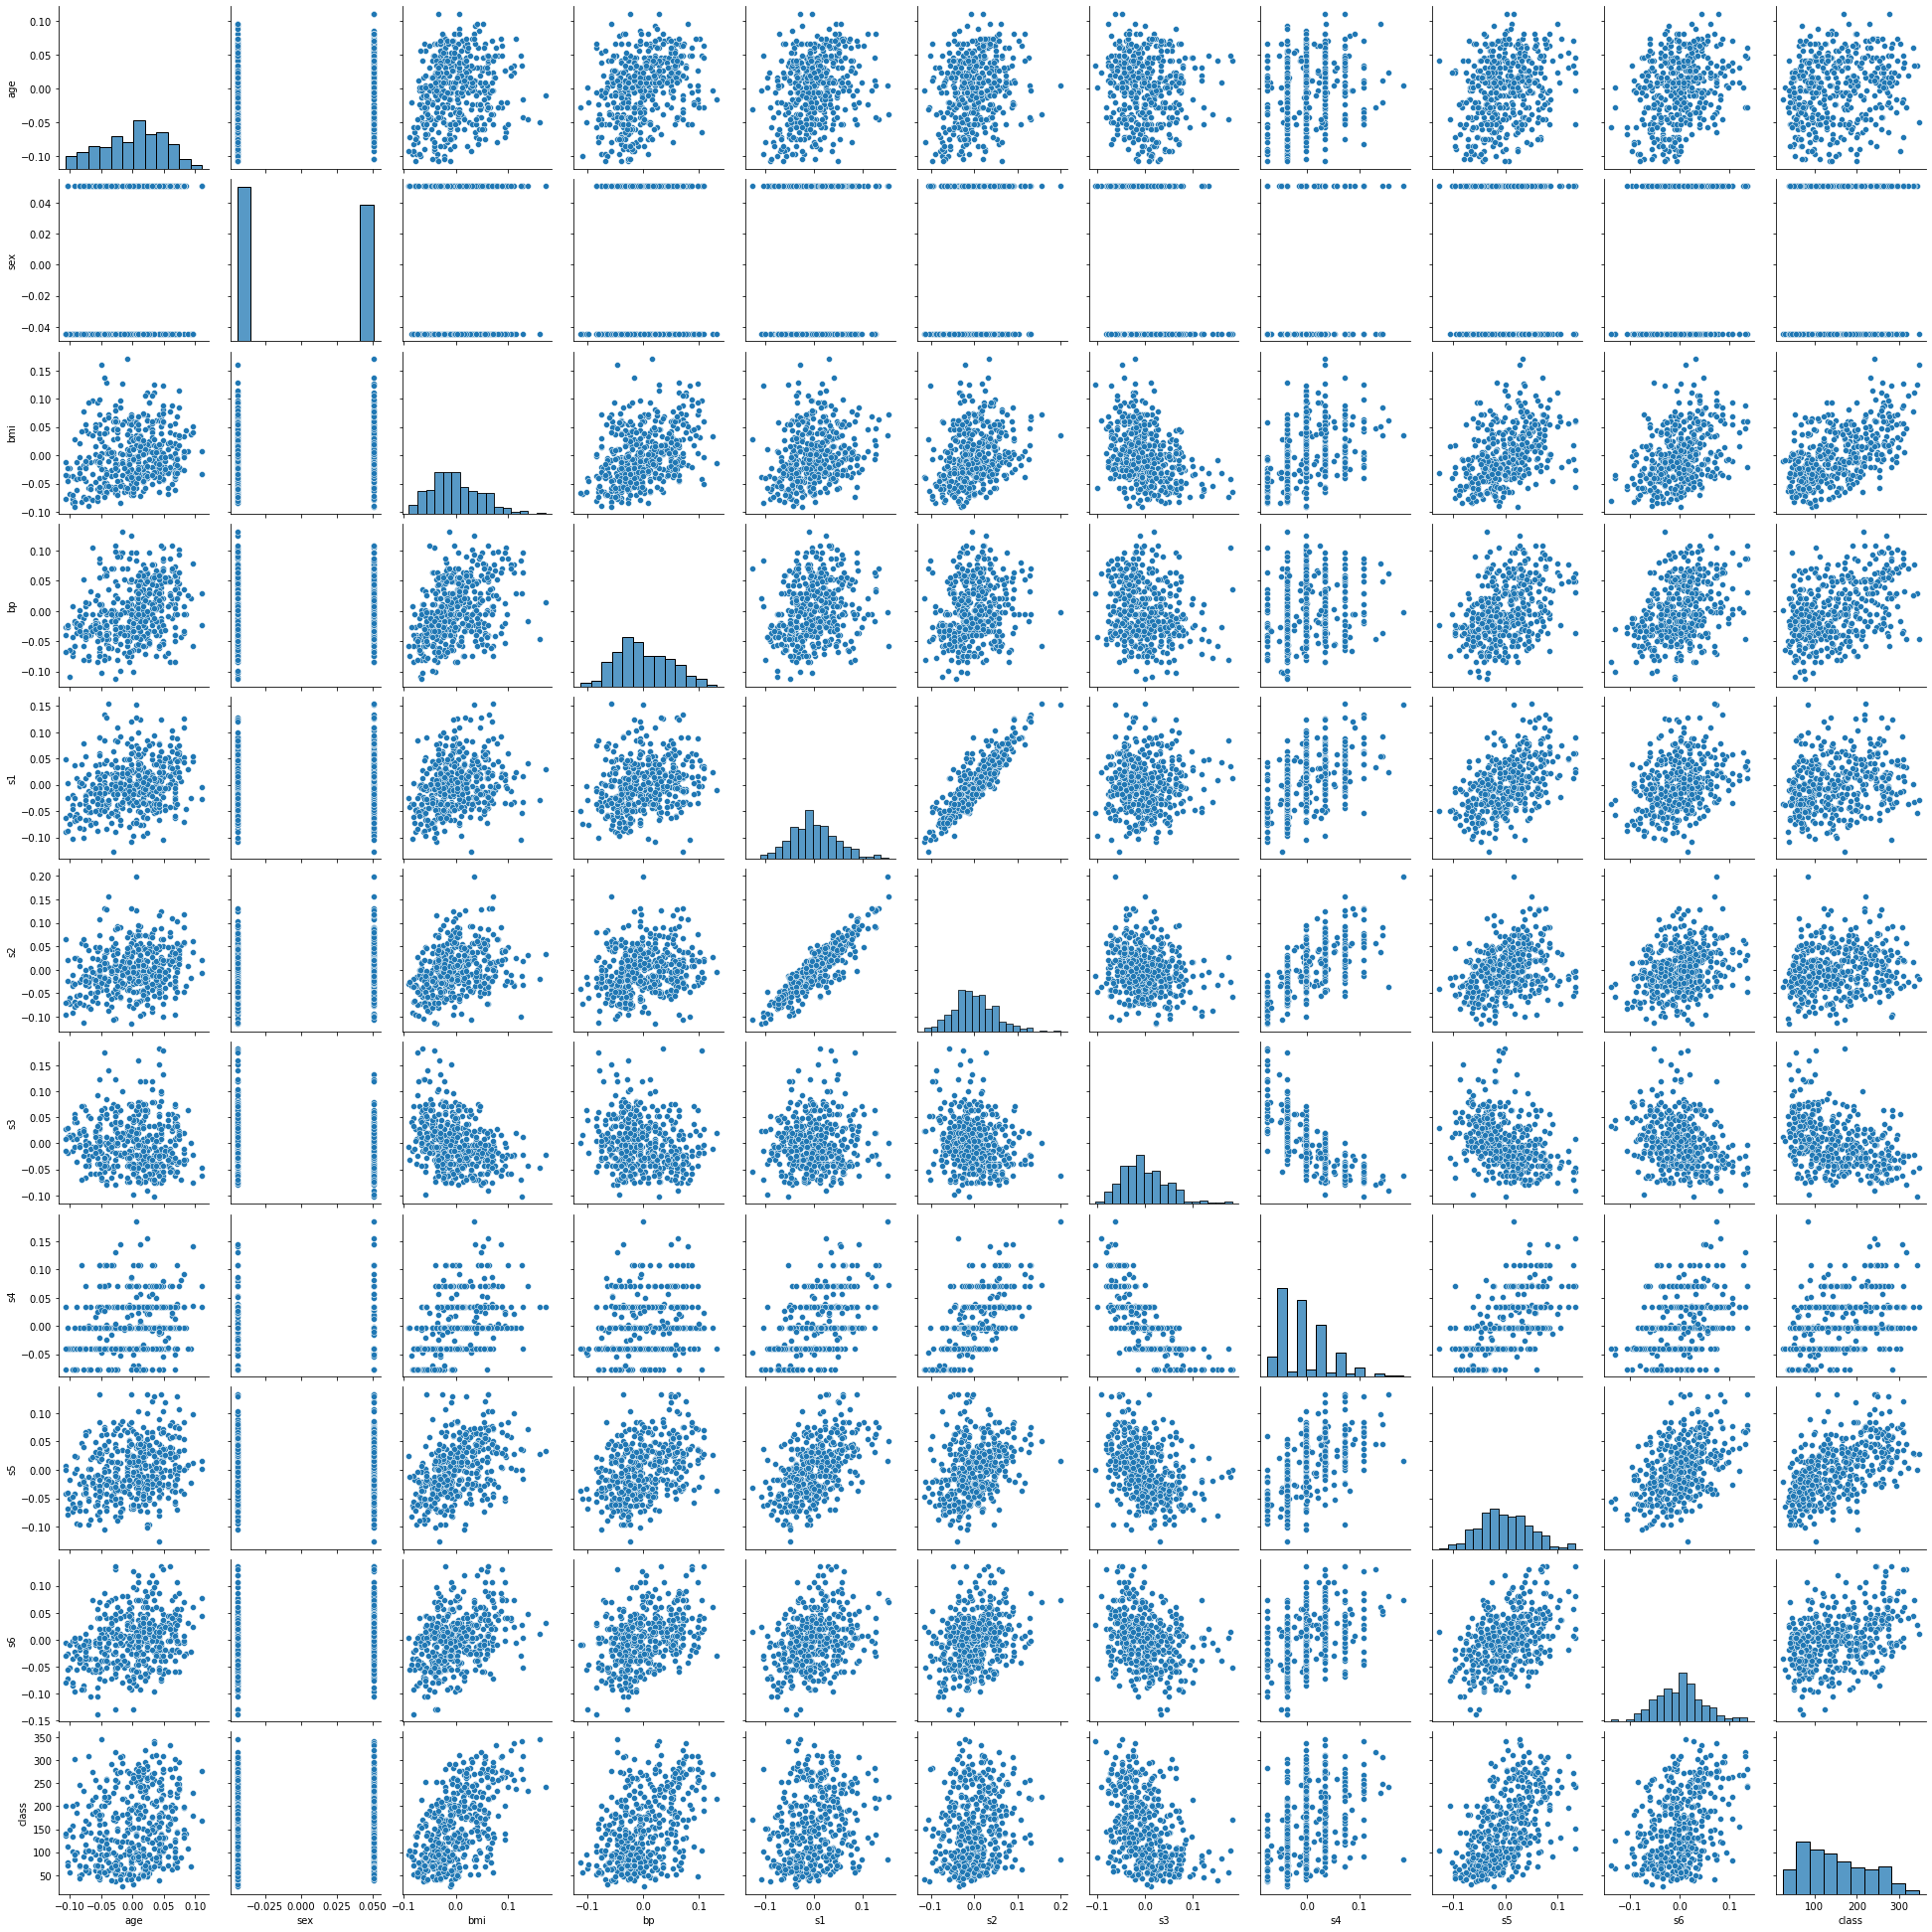

In [48]:
sns.pairplot(data)

In [ ]:
rows=2
cols=7
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(16,4))
col=data.columns   #14 It will be list
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [50]:
corrmat=data.corr() # to show correlation between two variables
corrmat

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,class
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


<AxesSubplot:>

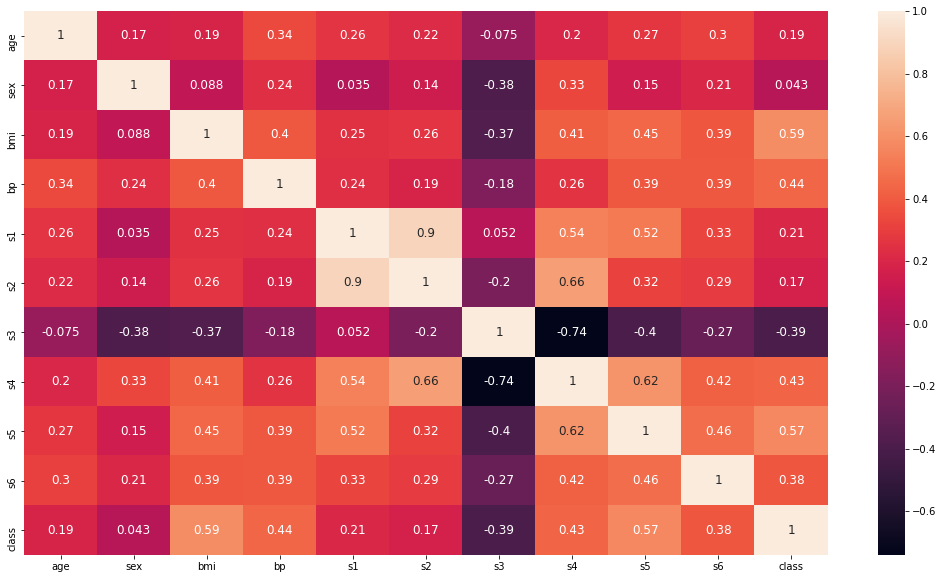

In [51]:
fig, ax=plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size':12})

In [52]:
corrmat.index

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'class'], dtype='object')

In [54]:
corrmat.index.values

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'class'], dtype=object)

In [55]:
def getCorrelatedFeature(corrdata, threshold):
    feature=[]
    value=[]
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df

In [56]:
threshold=0.50
corr_value=getCorrelatedFeature(corrmat['class'],threshold)
corr_value

,Corr Value
bmi,0.586450
s5,0.565883
class,1.000000


In [57]:
corr_value.index.values

array(['bmi', 's5', 'class'], dtype=object)

In [58]:
correlated_data=data[corr_value.index]
correlated_data.head()

,bmi,s5,class
0,0.061696,0.019908,151.0
1,-0.051474,-0.068330,75.0
2,0.044451,0.002864,141.0
3,-0.011595,0.022692,206.0
4,-0.036385,-0.031991,135.0


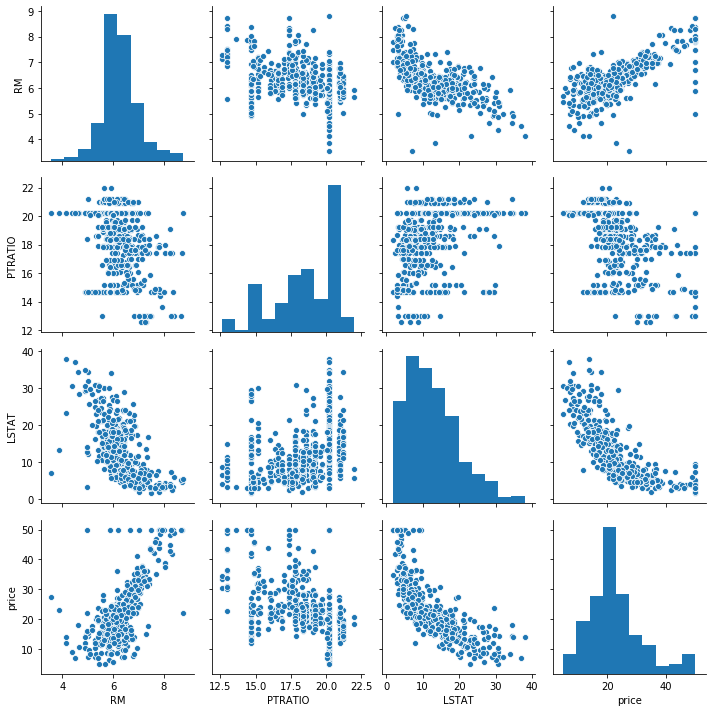

In [27]:
sns.pairplot(correlated_data)
plt.tight_layout()

<AxesSubplot:>

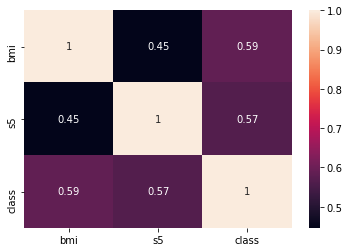

In [59]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':10})

## shuffle and split the data

In [60]:
X=correlated_data.drop("class",axis=1)
y=correlated_data["class"]
X.head()

,bmi,s5
0,0.061696,0.019908
1,-0.051474,-0.068330
2,0.044451,0.002864
3,-0.011595,0.022692
4,-0.036385,-0.031991


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
X_train.shape, X_test.shape #number of data left to train and test the model repectively

((353, 2), (89, 2))

## Train the Model 

In [66]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
y_predict=model.predict(X_test)

In [68]:
y_predict

array([227.52154336, 238.11421877, 146.98347172, 111.74775401,
       162.33467454, 258.37466552, 112.78922205, 192.68198668,
       143.70245408, 224.12815937, 138.36426076, 188.4634894 ,
       106.77232632,  87.8908884 , 232.18162387,  91.52384538,
       112.1389952 ,  73.58342153,  54.39472829, 179.14878972,
       152.65115627, 170.38953092, 151.59869089, 160.84574913,
       228.76323113, 187.4836244 , 114.88024496,  94.1431178 ,
       173.1183614 , 176.18384326, 167.45223206,  72.83130956,
       118.21070072, 148.35877545, 167.94751492, 174.84025088,
       149.73973439, 152.34331337, 124.7090953 , 195.00299047,
        87.2174152 , 157.5746423 , 174.05460626, 171.70859861,
       158.58282887,  74.39768342, 149.78290952, 143.89743784,
       135.30937791, 192.21273707, 138.24404694,  79.96653514,
       129.03069506, 164.88729877, 208.71964156, 161.93114305,
       193.90174856, 117.22325508, 142.92157842, 188.93683029,
       201.80273696, 158.83380025, 153.85805773, 129.17

In [72]:
df=pd.DataFrame(data=[y_predict,y_test])
df.T

,0,1
0,227.521543,321.0
1,238.114219,215.0
2,146.983472,127.0
3,111.747754,64.0
4,162.334675,175.0
...,...,...
84,81.787318,104.0
85,88.589781,49.0
86,165.437584,103.0
87,184.124532,142.0


In [71]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("R2 Score:", score)    #the variation our model can hold more the better
print("MAE:", mae)     #mean absolute error
print("MSE", mse)    # mean square error

R2 Score: 0.28353174666848324
MAE: 47.98195887431445
MSE 3673.996921976781
